<a href="https://colab.research.google.com/github/Angelgz011/estadistica2/blob/main/eii_u2_ep_%3C22150429%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Angelgz011/estadistica2/refs/heads/main/Hipertension_Arterial_Mexico.csv")
df.dropna(inplace=True)


df.drop(columns = ['FOLIO_I'], inplace = True)
df

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2,62,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280,0
4359,1,39,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,130,4,19.193721,780,0
4360,2,69,15.9,11,2.9,1.9,21,44.0,74,0.34,...,71.20,148.6,47.2,38.0,0.0,147,4,1.000000,300,0
4361,1,67,17.6,14,5.5,4.0,44,96.0,171,0.80,...,68.20,167.7,51.5,36.5,96.4,108,2,1.000000,240,0


Index(['sexo', 'edad', 'concentracion_hemoglobina', 'temperatura_ambiente',
       'valor_acido_urico', 'valor_albumina', 'valor_colesterol_hdl',
       'valor_colesterol_ldl', 'valor_colesterol_total', 'valor_creatina',
       'resultado_glucosa', 'valor_insulina', 'valor_trigliceridos',
       'resultado_glucosa_promedio', 'valor_hemoglobina_glucosilada',
       'valor_ferritina', 'valor_folato', 'valor_homocisteina',
       'valor_proteinac_reactiva', 'valor_transferrina',
       'valor_vitamina_bdoce', 'valor_vitamina_d', 'peso', 'estatura',
       'medida_cintura', 'segundamedicion_peso', 'segundamedicion_estatura',
       'distancia_rodilla_talon', 'circunferencia_de_la_pantorrilla',
       'segundamedicion_cintura', 'tension_arterial', 'sueno_horas',
       'masa_corporal', 'actividad_total', 'riesgo_hipertension'],
      dtype='object')


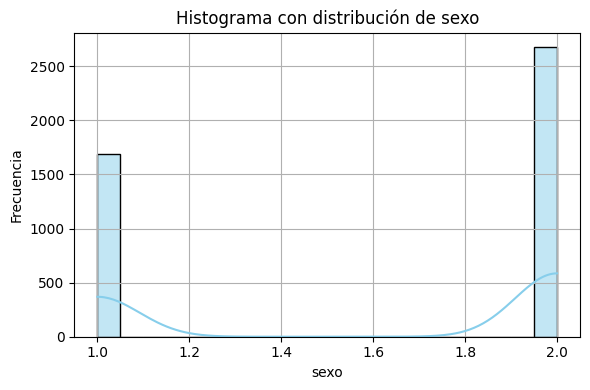

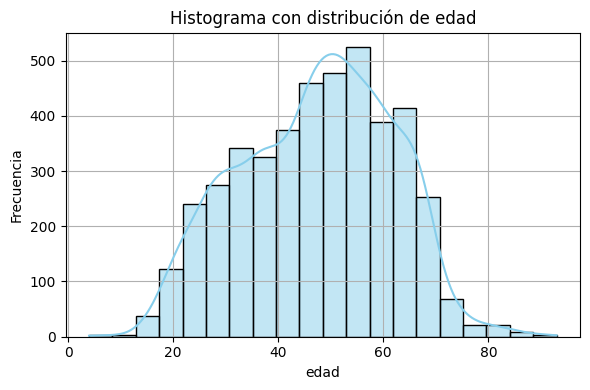

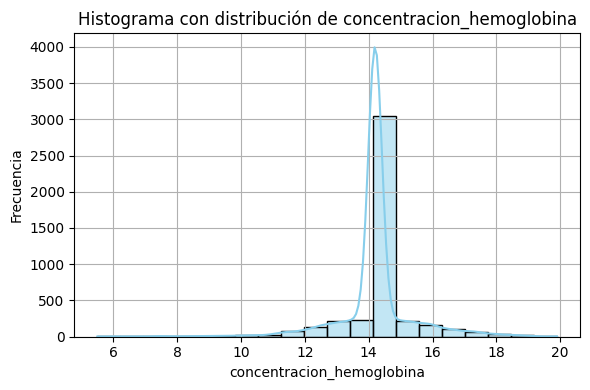

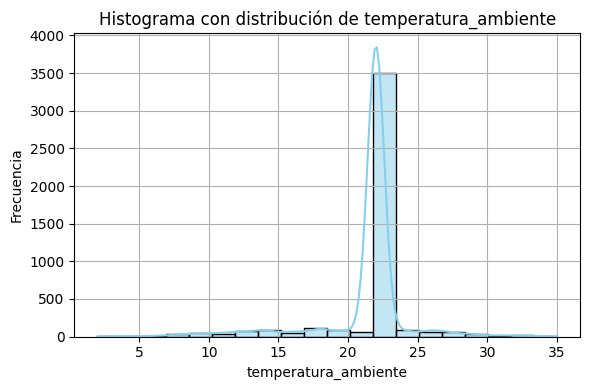

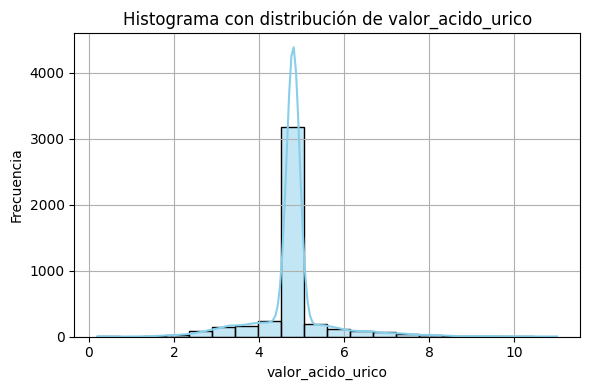

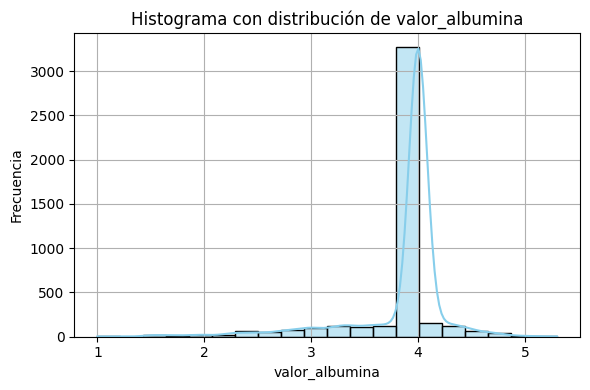

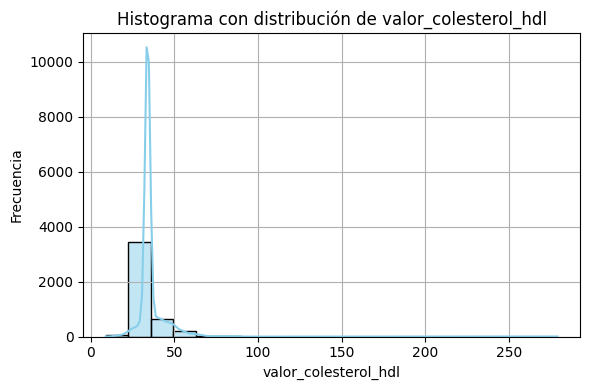

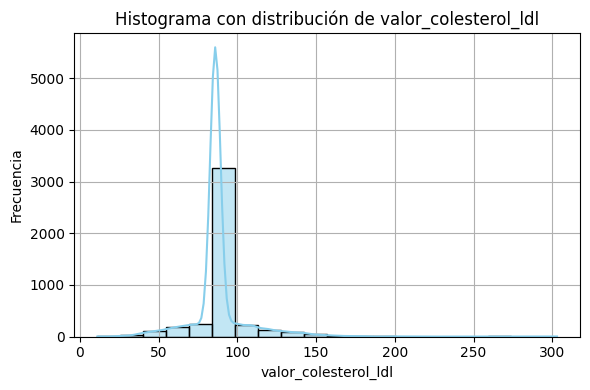

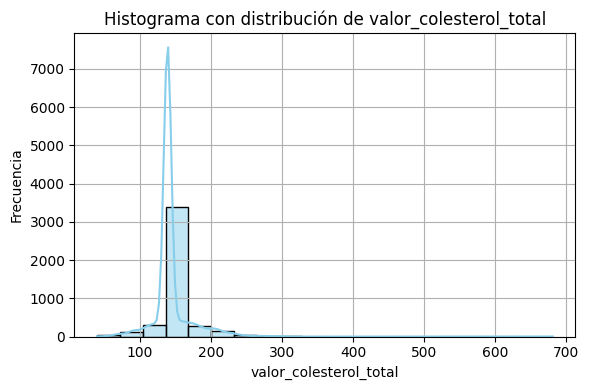

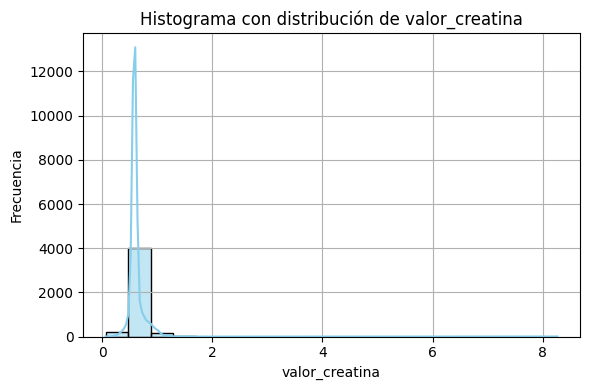

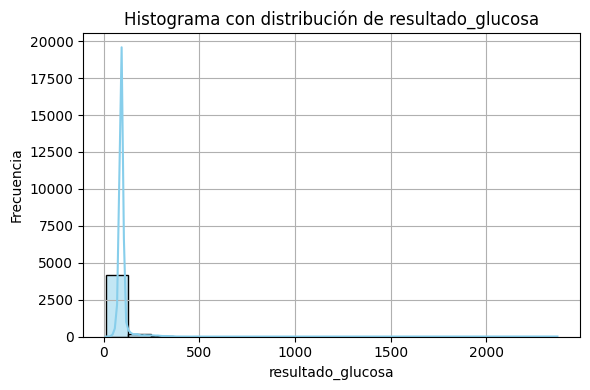

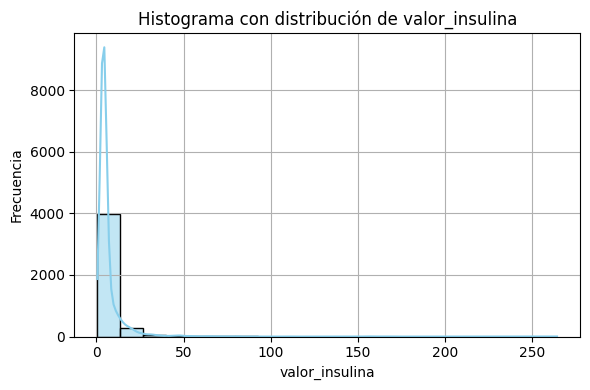

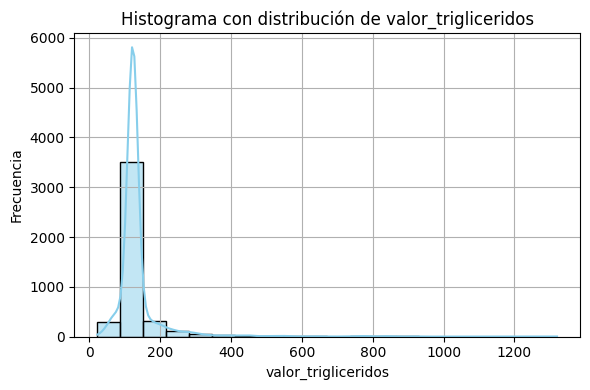

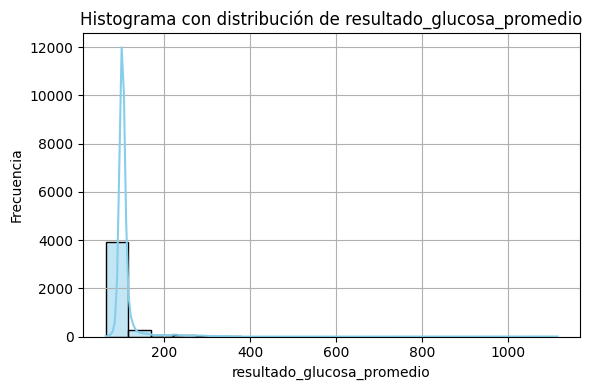

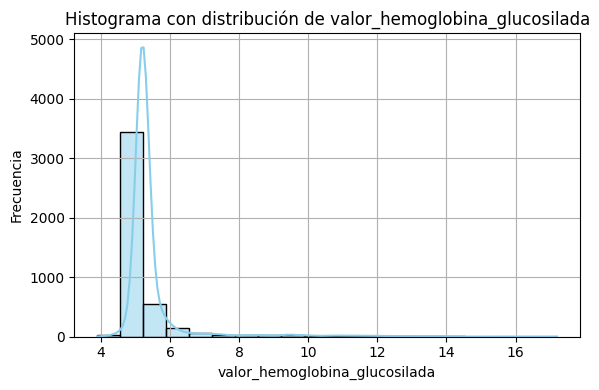

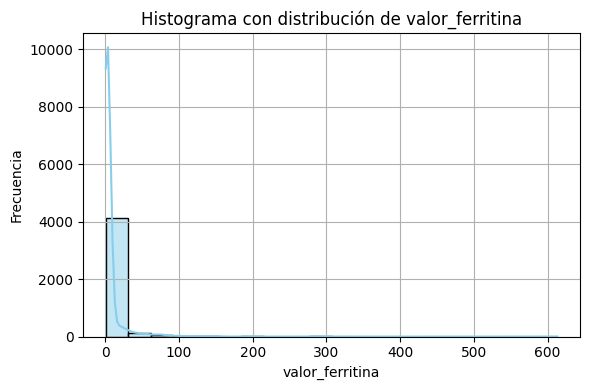

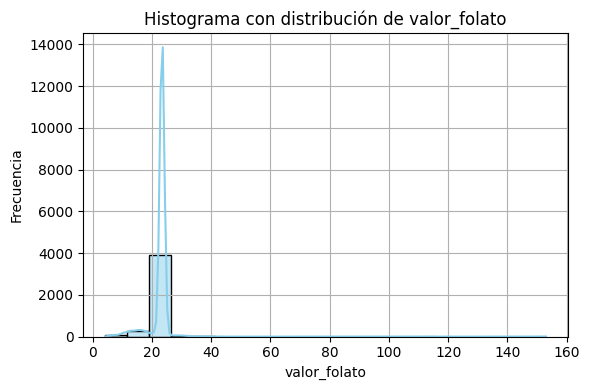

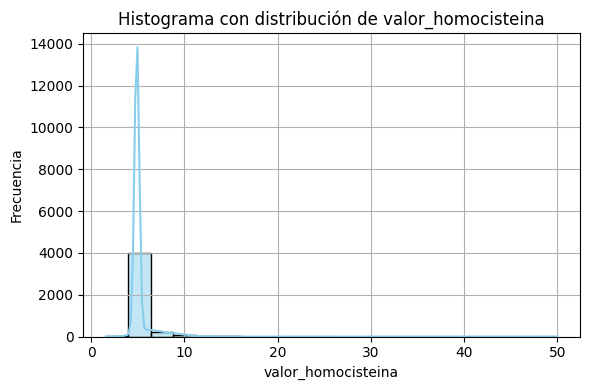

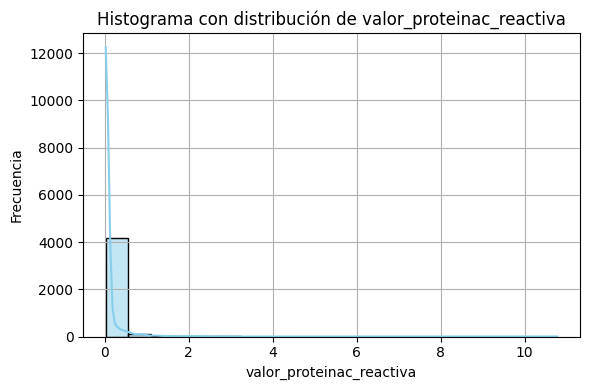

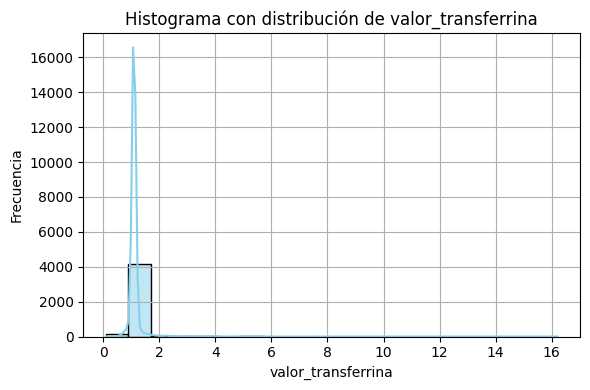

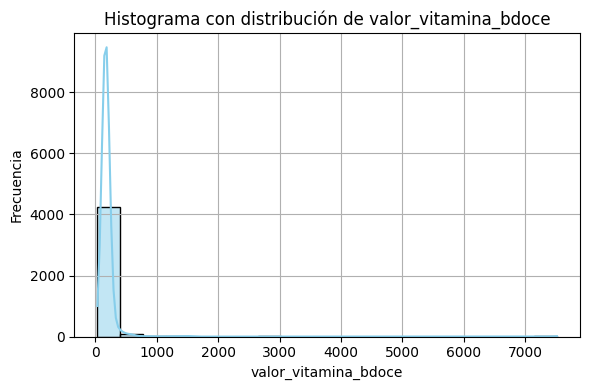

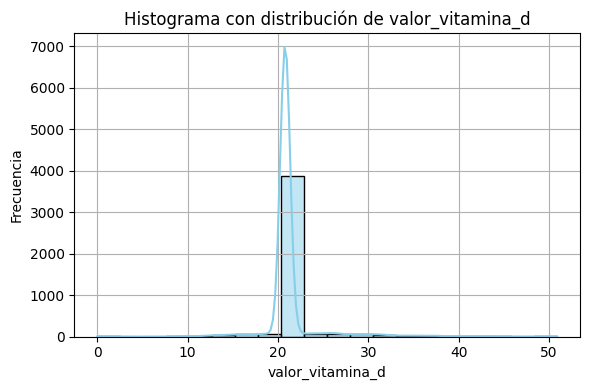

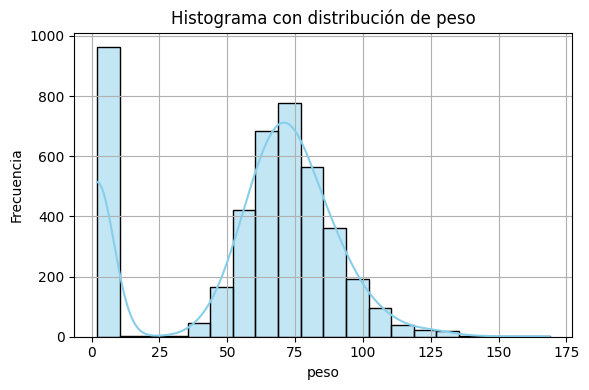

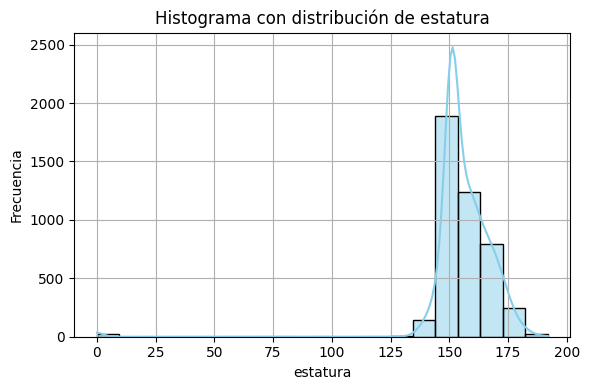

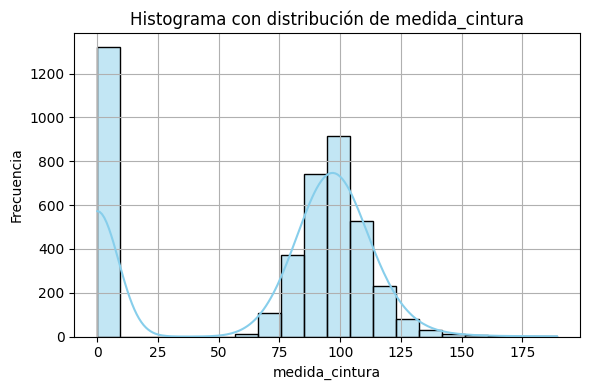

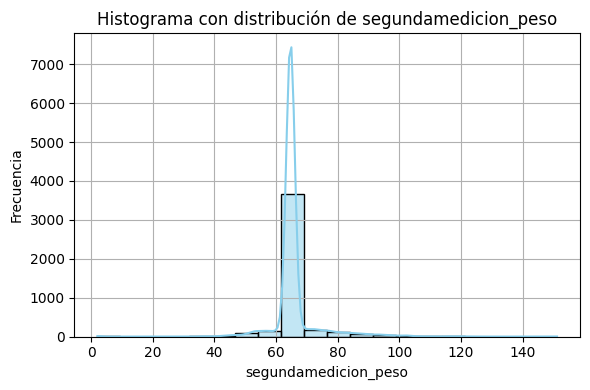

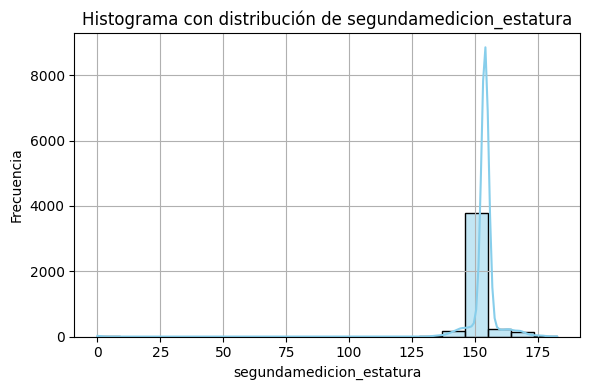

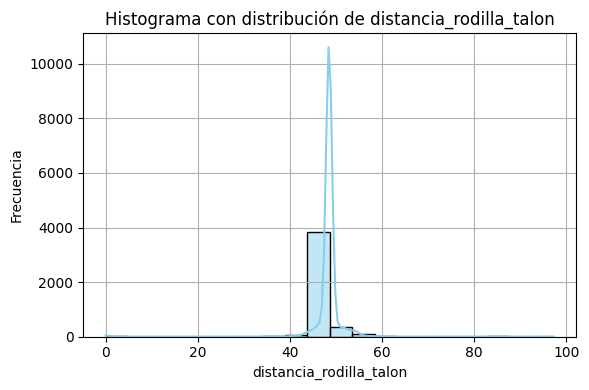

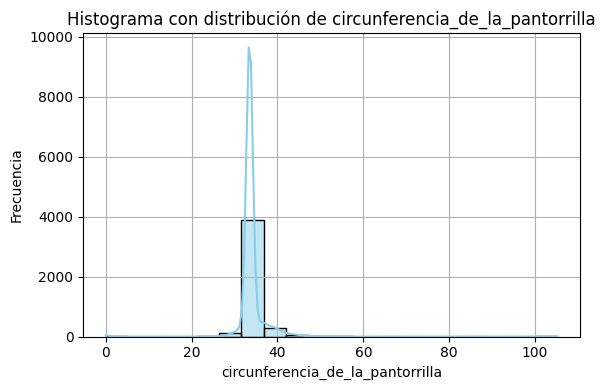

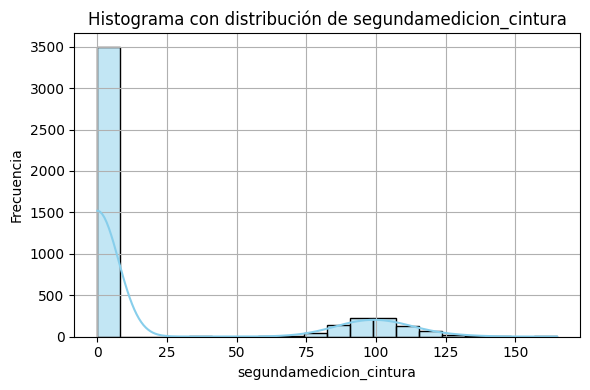

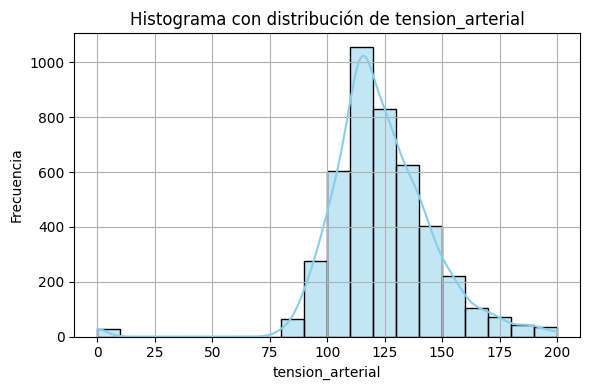

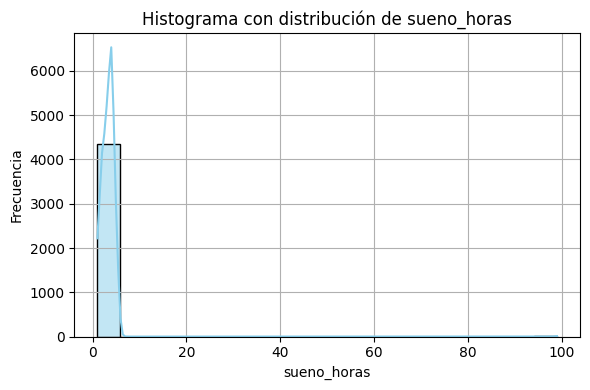

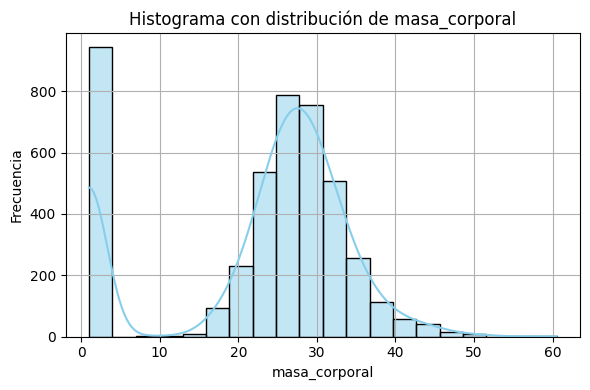

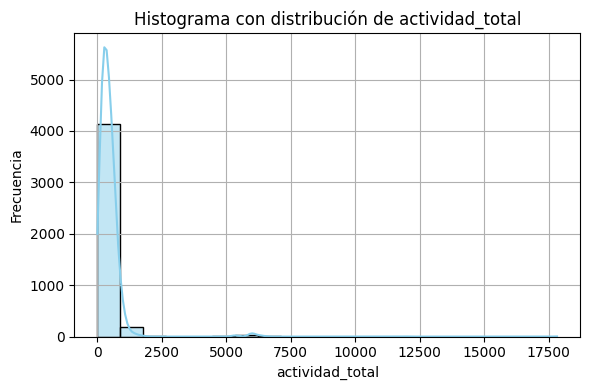

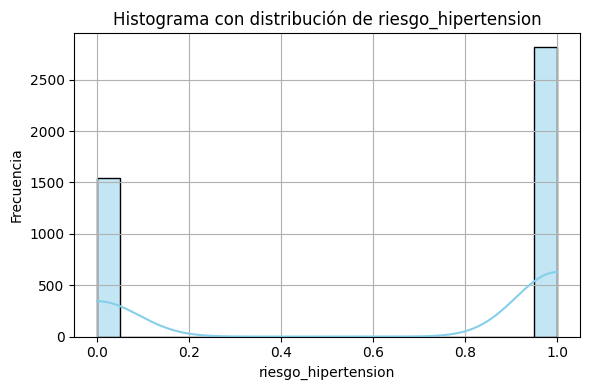

In [21]:
numeric_cols = df.select_dtypes(include='number').columns
print(numeric_cols)

import seaborn as sns
import matplotlib.pyplot as plt

# Obtener solo columnas numéricas
variables = df.select_dtypes(include='number').columns

# Crear histograma con línea de distribución para cada variable
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histograma con distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

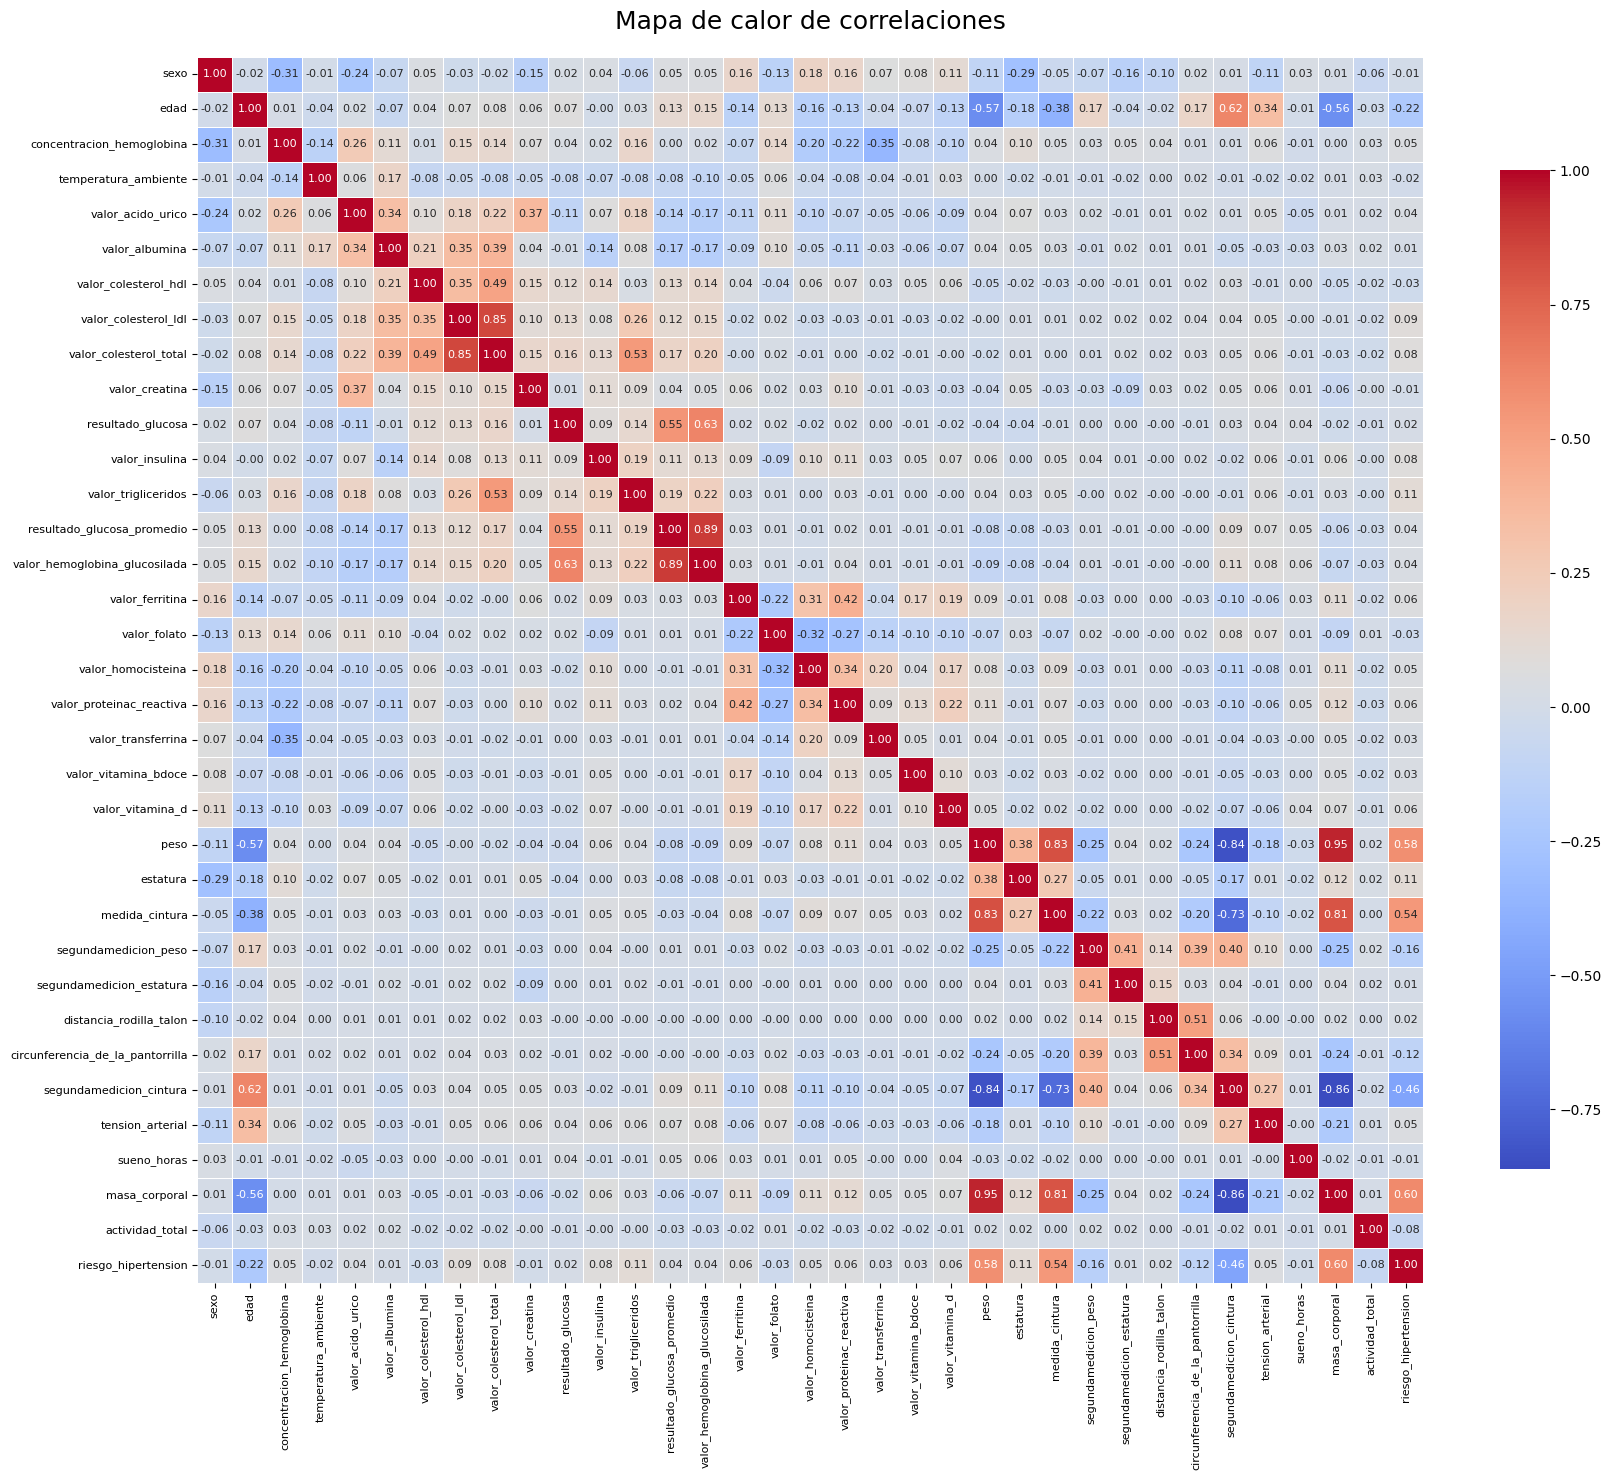

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Ajustar tamaño del gráfico dinámicamente según la cantidad de variables
num_vars = len(correlation_matrix)
fig_size = max(12, num_vars * 0.5)

plt.figure(figsize=(fig_size, fig_size))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.6},
            annot_kws={"size": 8})

plt.title("Mapa de calor de correlaciones", fontsize=18, pad=20)
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


In [23]:
import statsmodels.api as sm

# Seleccionar variables
X = df[['masa_corporal', 'medida_cintura']]
y = df['riesgo_hipertension']

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo
modelo = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo.summary())


                             OLS Regression Results                            
Dep. Variable:     riesgo_hipertension   R-squared:                       0.368
Model:                             OLS   Adj. R-squared:                  0.367
Method:                  Least Squares   F-statistic:                     1267.
Date:                 Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                         02:30:59   Log-Likelihood:                -1974.2
No. Observations:                 4363   AIC:                             3954.
Df Residuals:                     4360   BIC:                             3974.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1220      0.0

# HIPOTESIS
"La medida de la cintura influye directamente con el indice de masa corporal, lo cual se asocia a un mayor riesgo de hpertension"



In [24]:
# Ecuación de regresión:
# riesgo_hipertension = 0.1220 + 0.0189 * masa_corporal + 0.0015 * medida_cintura

# Predecir con el modelo para comprobar su funcionamiento
import statsmodels.api as sm
X = df[['masa_corporal', 'medida_cintura']]
X = sm.add_constant(X)
y = df['riesgo_hipertension']
modelo = sm.OLS(y, X).fit()

# Mostrar ecuación
print("Ecuación de regresión ajustada:")
print(f"riesgo_hipertension = {modelo.params[0]:.4f} + {modelo.params[1]:.4f}*masa_corporal + {modelo.params[2]:.4f}*medida_cintura")

# Predecir el riesgo para los primeros 5 registros
predicciones = modelo.predict(X)
print("\nPredicciones para los primeros 5 casos:")
print(predicciones.head())





Ecuación de regresión ajustada:
riesgo_hipertension = 0.1220 + 0.0189*masa_corporal + 0.0015*medida_cintura

Predicciones para los primeros 5 casos:
0    0.743348
1    0.140923
2    0.140923
3    0.761109
4    0.140923
dtype: float64


<ipython-input-24-97b387abbdd9>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"riesgo_hipertension = {modelo.params[0]:.4f} + {modelo.params[1]:.4f}*masa_corporal + {modelo.params[2]:.4f}*medida_cintura")


In [25]:
# Coeficiente de determinación
r2 = modelo.rsquared
print(f"Coeficiente de determinación (R²): {r2:.3f}")

# Interpretación
if r2 < 0.4:
    print("Interpretación: El modelo explica un nivel moderado de la variabilidad del riesgo de hipertensión.")
else:
    print("Interpretación: El modelo explica una parte importante de la variabilidad del riesgo de hipertensión.")


Coeficiente de determinación (R²): 0.368
Interpretación: El modelo explica un nivel moderado de la variabilidad del riesgo de hipertensión.


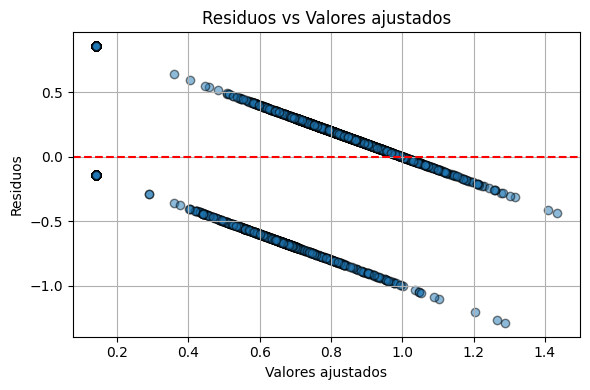

In [26]:
import matplotlib.pyplot as plt

residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

plt.figure(figsize=(6, 4))
plt.scatter(valores_ajustados, residuos, alpha=0.5, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores ajustados')
plt.grid(True)
plt.tight_layout()
plt.show()


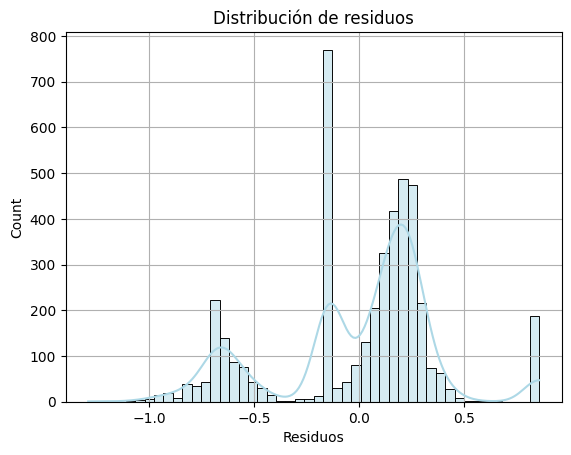

Shapiro-Wilk p-value: 0.00000
✘ Los residuos NO tienen una distribución normal.


In [27]:
import seaborn as sns
import scipy.stats as stats

# Histograma con KDE
sns.histplot(residuos, kde=True, color='lightblue')
plt.title("Distribución de residuos")
plt.xlabel("Residuos")
plt.grid(True)
plt.show()

# Prueba de Shapiro-Wilk
stat, p = stats.shapiro(residuos)
print(f"Shapiro-Wilk p-value: {p:.5f}")

if p > 0.05:
    print("✔ Los residuos tienen una distribución normal.")
else:
    print("✘ Los residuos NO tienen una distribución normal.")


In [28]:
"""
Conclusión:

El modelo de regresión lineal muestra que tanto la masa corporal como la medida de cintura son predictores
significativos del riesgo de hipertensión (ambos con p < 0.001). El modelo explica el 36.8% de la varianza
del riesgo, lo cual es razonable para un fenómeno multifactorial como este.

Los residuos cumplen en gran medida con los supuestos de linealidad y homoscedasticidad. Aunque presentan
ligeras desviaciones respecto a la normalidad, el tamaño de muestra grande (4363 observaciones) hace que el
modelo sea confiable.

En resumen, existe evidencia estadística suficiente para afirmar que un mayor índice de masa corporal y una
mayor medida de cintura se asocian con un mayor riesgo de hipertensión arterial.
"""


'\nConclusión:\n\nEl modelo de regresión lineal muestra que tanto la masa corporal como la medida de cintura son predictores\nsignificativos del riesgo de hipertensión (ambos con p < 0.001). El modelo explica el 36.8% de la varianza\ndel riesgo, lo cual es razonable para un fenómeno multifactorial como este.\n\nLos residuos cumplen en gran medida con los supuestos de linealidad y homoscedasticidad. Aunque presentan\nligeras desviaciones respecto a la normalidad, el tamaño de muestra grande (4363 observaciones) hace que el\nmodelo sea confiable.\n\nEn resumen, existe evidencia estadística suficiente para afirmar que un mayor índice de masa corporal y una\nmayor medida de cintura se asocian con un mayor riesgo de hipertensión arterial.\n'